<a href="https://colab.research.google.com/github/rocklambros/email-spam-classifier-naive-bayes/blob/main/Rock_Lambros_COMP3009_Project_Naive_Bayes_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement a Naive Bayes classifier from scratch and using scikit-learn to classify emails as spam or not spam based on the dataset provided in "/content/synthetic_email_dataset.csv". Compare the two implementations, discuss the independence assumption, and include visualizations, all within a Google Colab notebook to fulfill the requirements of a Master's level assignment.

## Load and explore data

### Subtask:
Load the `synthetic_email_dataset.csv` file into a pandas DataFrame and perform initial data exploration to understand its structure and content.


**Reasoning**:
Load the data into a pandas DataFrame and perform initial exploration as instructed.



In [67]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/synthetic_email_dataset.csv') # Load the CSV file into a pandas DataFrame.

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head()) # Display the first few rows to inspect the data.

# Get information about the DataFrame
print("\nDataFrame Info:")
df.info() # Print concise summary of the DataFrame, including column data types and non-null values.

# Get descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
display(df.describe()) # Display descriptive statistics for numerical columns (or object columns in this case).

First 5 rows of the DataFrame:


,Status,From (Envelope),From (Header),To,Subject,Sent Date/Time,IP Address,Attachment,Route,Info,Spam Score,Spam Detection
0,Archived,<support@university.edu>,Support <support@university.edu>,<user@example.com>,Project update - AI Research,Thu Sep 25 06:14:32 EDT 2025,66.51.167.180,NaN,inbound,Hard Bounce,1,NaN
1,Archived,<mike.johnson@business.net>,Mike.Johnson <mike.johnson@business.net>,<user@example.com>,Account security notification,Tue Sep 16 11:38:16 EDT 2025,74.187.32.250,NaN,inbound,Awaiting indexing,0,NaN
2,Bounced,<support@consulting.com>,Support <support@consulting.com>,<user@example.com>,Weekly newsletter - AI Research,Fri Sep 19 14:40:53 EDT 2025,10.94.172.69,NaN,outbound,NaN,0,NaN
3,Bounced,<promo488@offers.info>,<promo488@offers.info>,<user@example.com>,FREE trial - act now!,Sat Sep 20 01:51:20 EDT 2025,205.69.17.55,NaN,outbound,NaN,21,Moderate
4,Bounced,<marketing4041@untrusted.biz>,<marketing4041@untrusted.biz>,<user@example.com>,Last chance to save big!,Thu Sep 04 18:27:57 EDT 2025,217.103.93.57,NaN,inbound,Indexed and archived,49,Moderate



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Status           5000 non-null   object
 1   From (Envelope)  5000 non-null   object
 2   From (Header)    5000 non-null   object
 3   To               5000 non-null   object
 4   Subject          5000 non-null   object
 5   Sent Date/Time   5000 non-null   object
 6   IP Address       5000 non-null   object
 7   Attachment       274 non-null    object
 8   Route            5000 non-null   object
 9   Info             2972 non-null   object
 10  Spam Score       5000 non-null   int64 
 11  Spam Detection   2487 non-null   object
dtypes: int64(1), object(11)
memory usage: 468.9+ KB

Descriptive Statistics:


,Spam Score
count,5000.000000
mean,18.925600
std,27.811335
min,0.000000
25%,0.000000
50%,9.000000
75%,30.000000
max,156.000000


## Preprocess data

### Subtask:
Clean and prepare the data for the Naive Bayes model. This will likely involve handling text data, such as tokenization and creating a vocabulary.


**Reasoning**:
Select relevant columns, handle missing values, convert the target variable, tokenize the text, create vocabulary, and transform text data into feature vectors in a single code block to prepare the data for the Naive Bayes model as instructed.



In [68]:
import re # Import the regular expression module.
import pandas as pd # Import pandas to use isna()
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer for text tokenization and vectorization.

# 1. Select relevant columns
# Keep 'Subject' and 'Spam Detection' for the new spam definition
df_cleaned = df[['Subject', 'Spam Detection']].copy() # Select 'Subject' and 'Spam Detection' columns for cleaning and create a copy.

# 2. Handle missing values - Fill NaN in 'Subject' with empty string
df_cleaned['Subject'] = df_cleaned['Subject'].fillna('') # Replace any missing values (NaN) in the 'Subject' column with empty strings using the recommended method.

# 3. Convert 'Spam Detection' to binary target variable
# Define 'spam' as where 'Spam Detection' is NOT null, 'not spam' otherwise.
df_cleaned['is_spam'] = df_cleaned['Spam Detection'].apply(lambda x: 0 if pd.isna(x) else 1) # Create a new binary column 'is_spam': 1 if 'Spam Detection' is not null, else 0.

# 4. Tokenize the text data in 'Subject' and 5. Create a vocabulary and 6. Transform text data
# Using CountVectorizer to handle tokenization, vocabulary creation, and feature vector generation
# We will use a simple regex to keep only alphanumeric characters and spaces
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b') # Initialize CountVectorizer to tokenize words using the specified pattern.
X = vectorizer.fit_transform(df_cleaned['Subject']) # Fit the vectorizer on the 'Subject' column and transform the text data into a sparse matrix of token counts (feature matrix).
y = df_cleaned['is_spam'] # Assign the binary 'is_spam' column as the target variable.

print("Shape of feature matrix (X):", X.shape) # Print the dimensions of the feature matrix (number of emails, vocabulary size).
print("Shape of target vector (y):", y.shape) # Print the dimensions of the target vector (number of emails).
print("\nFirst 5 feature vectors:")
print(X[:5].toarray()) # Display the first 5 rows of the feature matrix as a dense array for inspection.
print("\nFirst 5 target values:", y[:5].tolist()) # Display the first 5 values of the target vector as a list.
print("\nVocabulary size:", len(vectorizer.vocabulary_)) # Print the total number of unique words (tokens) found in the vocabulary.

Shape of feature matrix (X): (5000, 1097)
Shape of target vector (y): (5000,)

First 5 feature vectors:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

First 5 target values: [0, 0, 0, 1, 1]

Vocabulary size: 1097


## Implement naive bayes from scratch

### Subtask:
Build a Naive Bayes classifier manually using conditional probability and Bayes' theorem. Compute priors and likelihoods.


**Reasoning**:
Calculate the prior probabilities and word likelihoods for spam and not spam classes using the tokenized data and apply Laplace smoothing.



In [69]:
import numpy as np

# 1. Calculate Prior Probabilities
total_emails = len(y)
spam_count = y.sum()
not_spam_count = total_emails - spam_count

prior_spam = spam_count / total_emails
prior_not_spam = not_spam_count / total_emails

print(f"Prior probability of spam: {prior_spam:.4f}")
print(f"Prior probability of not spam: {prior_not_spam:.4f}")

# 2. Calculate Likelihoods with Laplace Smoothing
# Convert y to a numpy array for correct indexing of sparse matrix X
y_np = y.to_numpy()

# Separate the feature matrix X based on the target variable y
X_spam = X[y_np == 1]
X_not_spam = X[y_np == 0]

# Sum word counts for each class
word_counts_spam = X_spam.sum(axis=0)
word_counts_not_spam = X_not_spam.sum(axis=0)

# Total number of words in each class
total_words_spam = word_counts_spam.sum()
total_words_not_spam = word_counts_not_spam.sum()

# Vocabulary size (number of unique words)
vocab_size = X.shape[1]

# Apply Laplace smoothing (add-one smoothing)
# Likelihood = (word_count_in_class + 1) / (total_words_in_class + vocab_size)
likelihoods_spam = (word_counts_spam + 1) / (total_words_spam + vocab_size)
likelihoods_not_spam = (word_counts_not_spam + 1) / (total_words_not_spam + vocab_size)

# Store priors and likelihoods (as numpy arrays)
priors = {'spam': prior_spam, 'not_spam': prior_not_spam}
likelihoods = {'spam': np.array(likelihoods_spam)[0], 'not_spam': np.array(likelihoods_not_spam)[0]}


print("\nCalculated priors and likelihoods.")
print("Priors:", priors)
print("Shape of spam likelihoods:", likelihoods['spam'].shape)
print("Shape of not spam likelihoods:", likelihoods['not_spam'].shape)

Prior probability of spam: 0.4974
Prior probability of not spam: 0.5026

Calculated priors and likelihoods.
Priors: {'spam': np.float64(0.4974), 'not_spam': np.float64(0.5026)}
Shape of spam likelihoods: (1097,)
Shape of not spam likelihoods: (1097,)


In [70]:
import numpy as np # Import the numpy library for numerical operations.

# 1. Calculate Prior Probabilities
total_emails = len(y) # Get the total number of emails.
spam_count = y.sum() # Count the number of spam emails (where y is 1).
not_spam_count = total_emails - spam_count # Count the number of not-spam emails.

prior_spam = spam_count / total_emails # Calculate the prior probability of an email being spam.
prior_not_spam = not_spam_count / total_emails # Calculate the prior probability of an email being not spam.

print(f"Prior probability of spam: {prior_spam:.4f}") # Print the calculated prior probability of spam.
print(f"Prior probability of not spam: {prior_not_spam:.4f}") # Print the calculated prior probability of not spam.

# 2. Calculate Likelihoods with Laplace Smoothing
# Convert y to a numpy array for correct indexing of sparse matrix X
y_np = y.to_numpy() # Convert the pandas Series y to a numpy array for efficient indexing of the sparse matrix X.

# Separate the feature matrix X based on the target variable y
X_spam = X[y_np == 1] # Select rows from X where the corresponding y_np value is 1 (spam emails).
X_not_spam = X[y_np == 0] # Select rows from X where the corresponding y_np value is 0 (not-spam emails).

# Sum word counts for each class
word_counts_spam = X_spam.sum(axis=0) # Sum the word counts across all spam emails for each word in the vocabulary.
word_counts_not_spam = X_not_spam.sum(axis=0) # Sum the word counts across all not-spam emails for each word in the vocabulary.

# Total number of words in each class
total_words_spam = word_counts_spam.sum() # Calculate the total number of words in all spam emails.
total_words_not_spam = word_counts_not_spam.sum() # Calculate the total number of words in all not-spam emails.

# Vocabulary size (number of unique words)
vocab_size = X.shape[1] # Get the total number of unique words from the shape of the feature matrix.

# Apply Laplace smoothing (add-one smoothing)
# Likelihood = (word_count_in_class + 1) / (total_words_in_class + vocab_size)
likelihoods_spam = (word_counts_spam + 1) / (total_words_spam + vocab_size) # Calculate the smoothed likelihood of each word appearing in spam emails.
likelihoods_not_spam = (word_counts_not_spam + 1) / (total_words_not_spam + vocab_size) # Calculate the smoothed likelihood of each word appearing in not-spam emails.

# Store priors and likelihoods (as numpy arrays)
priors = {'spam': prior_spam, 'not_spam': prior_not_spam} # Store the prior probabilities in a dictionary.
likelihoods = {'spam': np.array(likelihoods_spam)[0], 'not_spam': np.array(likelihoods_not_spam)[0]} # Store the likelihood arrays in a dictionary, converting from sparse to dense.


print("\nCalculated priors and likelihoods.") # Indicate that calculations are complete.
print("Priors:", priors) # Print the calculated prior probabilities.
print("Shape of spam likelihoods:", likelihoods['spam'].shape) # Print the shape of the spam likelihood array.
print("Shape of not spam likelihoods:", likelihoods['not_spam'].shape) # Print the shape of the not-spam likelihood array.

Prior probability of spam: 0.4974
Prior probability of not spam: 0.5026

Calculated priors and likelihoods.
Priors: {'spam': np.float64(0.4974), 'not_spam': np.float64(0.5026)}
Shape of spam likelihoods: (1097,)
Shape of not spam likelihoods: (1097,)


## Classify new points (manual)

### Subtask:
Use the hand-coded classifier to predict whether new, unseen email examples are spam or not.


**Reasoning**:
Implement a function to classify new email subjects using the calculated priors and likelihoods, and test it with example subjects.



In [71]:
# Get the vectorizer used in preprocessing
# If the kernel reset, re-fit the vectorizer to get the vocabulary mapping
# We fit it on the original cleaned subjects to ensure the vocabulary is the same
try:
    vectorizer # Check if vectorizer exists from previous steps.
except NameError:
    from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer if it doesn't exist.
    # Using a simple regex to keep only alphanumeric characters and spaces
    vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b') # Initialize CountVectorizer with the same pattern.
    vectorizer.fit(df_cleaned['Subject']) # Fit the vectorizer on the original data to rebuild the vocabulary.
    print("Vectorizer refitted.")

def classify_email(email_subject, vectorizer, priors, likelihoods):
    """Classifies an email subject as spam or not spam using Naive Bayes."""
    # Preprocess the input text using the same vectorizer
    email_vector = vectorizer.transform([email_subject]) # Transform the new email subject string into a feature vector using the fitted vectorizer.

    # Get the indices of the words present in the email subject
    word_indices = email_vector.indices # Get the indices of the non-zero elements in the feature vector, which correspond to the word indices in the vocabulary.

    # Calculate log posterior probability for each class
    # P(Class | Document) = P(Document | Class) * P(Class) / P(Document)
    # log(P(Class | Document)) = log(P(Document | Class)) + log(P(Class)) - log(P(Document))
    # P(Document | Class) = Product over words i: P(word_i | Class)
    # log(P(Document | Class)) = Sum over words i: log(P(word_i | Class))
    # We only need to compare log(P(Class | Document)) for spam and not_spam, so P(Document) term cancels out.
    log_posterior_spam = np.log(priors['spam']) # Start with the log of the prior probability for spam.
    log_posterior_not_spam = np.log(priors['not_spam']) # Start with the log of the prior probability for not spam.

    # Sum the log likelihoods of the words present in the email
    # We need to handle the case where a word in the new email is not in the vocabulary.
    # However, with Laplace smoothing, the likelihood of any word (even unseen) is non-zero,
    # so we don't need special handling for unseen words themselves, but we need to make
    # sure we are accessing the likelihoods array correctly based on word indices.
    # The `word_indices` from the transformed vector correspond to the indices in the vocabulary.
    if word_indices.size > 0: # Check if the email subject contains any words from the vocabulary.
        log_likelihoods_spam = np.log(likelihoods['spam'][word_indices]) # Get the log likelihoods for the words present in the email for the spam class.
        log_likelihoods_not_spam = np.log(likelihoods['not_spam'][word_indices]) # Get the log likelihoods for the words present in the email for the not-spam class.

        log_posterior_spam += log_likelihoods_spam.sum() # Add the sum of the log likelihoods for spam to the log prior.
        log_posterior_not_spam += log_likelihoods_not_spam.sum() # Add the sum of the log likelihoods for not spam to the log prior.


    # Compare the log posterior probabilities
    if log_posterior_spam > log_posterior_not_spam: # Compare the final log posterior probabilities.
        return 'spam' # Return 'spam' if the log posterior for spam is higher.
    else:
        return 'not_spam' # Otherwise, return 'not_spam'.

# Test the function with example email subjects
example_subjects = [
    "Claim your free prize now!", # Likely spam
    "Meeting reminder for tomorrow", # Likely not spam
    "Urgent: Your account has been compromised", # Likely spam
    "Project update and next steps", # Likely not spam
    "Win a free iPhone - click here!" # Likely spam
]

print("Classifying example emails:") # Print a header for the classification results.
for subject in example_subjects: # Iterate through the example subjects.
    prediction = classify_email(subject, vectorizer, priors, likelihoods) # Classify the current subject using the manual function.
    print(f"Subject: '{subject}' -> Predicted Class: {prediction}") # Print the subject and its predicted class.

Classifying example emails:
Subject: 'Claim your free prize now!' -> Predicted Class: spam
Subject: 'Meeting reminder for tomorrow' -> Predicted Class: not_spam
Subject: 'Urgent: Your account has been compromised' -> Predicted Class: not_spam
Subject: 'Project update and next steps' -> Predicted Class: not_spam
Subject: 'Win a free iPhone - click here!' -> Predicted Class: spam


## Implement naive bayes with scikit-learn

### Subtask:
Use the ` MultinomialNB` or `BernoulliNB` classifier from scikit-learn for comparison.


**Reasoning**:
Import the MultinomialNB class from scikit-learn, instantiate it, and train it on the feature matrix X and target vector y.



In [72]:
from sklearn.naive_bayes import MultinomialNB # Import the MultinomialNB classifier from scikit-learn.

# Instantiate a MultinomialNB classifier object
mnb = MultinomialNB() # Create an instance of the MultinomialNB classifier.

# Train the classifier using the feature matrix X and the target vector y
mnb.fit(X, y) # Train the classifier using the feature matrix X and the target vector y.

print("Multinomial Naive Bayes classifier trained successfully.") # Print a message indicating successful training.

Multinomial Naive Bayes classifier trained successfully.


## Classify new points (scikit-learn)

### Subtask:
Use the scikit-learn classifier to predict whether new, unseen email examples are spam or not.


**Reasoning**:
Define the new email subjects, transform them using the fitted vectorizer, and use the trained scikit-learn classifier to predict their class labels.



In [73]:
# 1. Define a list of new email subject strings to be classified.
new_emails = [
    "Claim your free gift card now!", # Likely spam
    "Meeting agenda for Monday", # Likely not spam
    "Urgent action required for your account", # Likely spam
    "Quarterly financial report", # Likely not spam
    "Limited time offer - Don't miss out!", # Likely spam
    "Your order has shipped", # Likely not spam
    "Invoice attached", # Likely not spam
    "Congratulations - You've won a prize!" # Likely spam
]

# 2. Use the vectorizer (fitted during the preprocessing step) to transform the list of new email subjects into a feature matrix.
# Ensure the vectorizer is the one fitted on the training data
# If the kernel reset, re-fit the vectorizer
try:
    vectorizer # Check if the vectorizer is available.
except NameError:
    from sklearn.feature_extraction.text import CountVectorizer # Import if not available.
    # Using a simple regex to keep only alphanumeric characters and spaces
    vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b') # Initialize.
    # Re-fit the vectorizer on the original data
    vectorizer.fit(df_cleaned['Subject']) # Fit on the training data again.
    print("Vectorizer refitted for scikit-learn classification.")


new_emails_X = vectorizer.transform(new_emails) # Transform the new email subjects into feature vectors using the fitted vectorizer.

# 3. Use the trained scikit-learn MultinomialNB classifier (mnb) to predict the class labels (spam or not spam) for the new feature matrix.
# Ensure the mnb classifier is the one trained in the previous step
# If the kernel reset, re-train the mnb
try:
    mnb # Check if the mnb classifier is available.
except NameError:
    from sklearn.naive_bayes import MultinomialNB # Import if not available.
    mnb = MultinomialNB() # Initialize.
    # Re-train the mnb on the original data
    mnb.fit(X, y) # Train the classifier on the training data again.
    print("MultinomialNB refitted for scikit-learn classification.")


predictions = mnb.predict(new_emails_X) # Predict the class labels for the new email feature vectors.

# 4. Print the original email subjects and their corresponding predicted class labels.
print("Predictions for new emails:") # Print a header for the predictions.
for email, prediction in zip(new_emails, predictions): # Iterate through the new emails and their predictions.
    # Convert numerical prediction back to 'spam' or 'not_spam'
    predicted_label = 'spam' if prediction == 1 else 'not_spam' # Convert the numerical prediction (0 or 1) to a human-readable label.
    print(f"Subject: '{email}' -> Predicted Class: {predicted_label}") # Print the email subject and its predicted class label.

Predictions for new emails:
Subject: 'Claim your free gift card now!' -> Predicted Class: spam
Subject: 'Meeting agenda for Monday' -> Predicted Class: not_spam
Subject: 'Urgent action required for your account' -> Predicted Class: not_spam
Subject: 'Quarterly financial report' -> Predicted Class: not_spam
Subject: 'Limited time offer - Don't miss out!' -> Predicted Class: spam
Subject: 'Your order has shipped' -> Predicted Class: not_spam
Subject: 'Invoice attached' -> Predicted Class: not_spam
Subject: 'Congratulations - You've won a prize!' -> Predicted Class: spam


## Compare classifiers

### Subtask:
Compare the performance and characteristics of the hand-coded classifier and the scikit-learn classifier. Discuss the differences and similarities.


**Reasoning**:
Compare the predictions of the hand-coded and scikit-learn classifiers for the example email subjects from the manual classification step and discuss the potential reasons for any differences.



In [74]:
# Example subjects used in the manual classification step
example_subjects_manual = [
    "Claim your free prize now!", # Likely spam
    "Meeting reminder for tomorrow", # Likely not spam
    "Urgent: Your account has been compromised", # Likely spam
    "Project update and next steps", # Likely not spam
    "Win a free iPhone - click here!" # Likely spam
]

print("Comparing predictions for example emails from manual classification:") # Header for the comparison.

for subject in example_subjects_manual: # Iterate through the example subjects.
    # Get prediction from hand-coded classifier
    manual_prediction = classify_email(subject, vectorizer, priors, likelihoods) # Get the prediction from the hand-coded function.

    # Get prediction from scikit-learn classifier
    # Need to transform the single subject into a feature vector
    sklearn_subject_X = vectorizer.transform([subject]) # Transform the current subject into a feature vector for scikit-learn.
    sklearn_prediction_numeric = mnb.predict(sklearn_subject_X)[0] # Get the numerical prediction from the scikit-learn classifier.
    sklearn_prediction = 'spam' if sklearn_prediction_numeric == 1 else 'not_spam' # Convert the numerical prediction to a label.

    print(f"Subject: '{subject}'") # Print the subject.
    print(f"  Hand-coded prediction: {manual_prediction}") # Print the manual classifier's prediction.
    print(f"  Scikit-learn prediction: {sklearn_prediction}") # Print the scikit-learn classifier's prediction.
    if manual_prediction != sklearn_prediction: # Check if the predictions differ.
        print("  Discrepancy noted!") # Indicate if there is a discrepancy.

print("\nDiscussion on potential reasons for differences:") # Header for discussing differences.
print("- **Floating-point precision:** Manual calculations might be susceptible to minor floating-point differences compared to optimized scikit-learn implementations.") # Explain the role of floating-point precision.
print("- **Laplace smoothing implementation:** While both use Laplace smoothing, subtle differences in how it's applied or handled internally could lead to variations.") # Discuss potential differences in smoothing implementation.
print("- **Handling of zero probabilities:** Although Laplace smoothing addresses zero probabilities for words in the vocabulary, the exact handling of probabilities near zero or underflow prevention might differ.") # Explain handling of near-zero probabilities.
print("- **Tokenizer differences:** Although we used the same `CountVectorizer`, very subtle differences in tokenization or vocabulary mapping if not perfectly aligned could occur.") # Mention potential subtle tokenizer differences.
print("- **Logarithmic calculations:** Both likely use logarithms to avoid underflow, but the specific implementation details might vary slightly.") # Discuss potential variations in log calculations.
print("\nSummary of similarities and differences:") # Header for summarizing similarities and differences.
print("- **Similarities:** Both implementations are based on the Naive Bayes principle, calculating prior probabilities and word likelihoods. Both use Laplace smoothing to handle unseen words or words with zero counts.") # List similarities.
print("- **Differences:** The scikit-learn implementation is a highly optimized and tested library function, while the hand-coded version is a direct implementation of the formula. Scikit-learn handles many internal details (like efficient sparse matrix operations and numerical stability) automatically, whereas these need explicit handling in the manual version. The prediction results for some edge cases or specific examples might differ due to the reasons mentioned above.") # List differences.

Comparing predictions for example emails from manual classification:
Subject: 'Claim your free prize now!'
  Hand-coded prediction: spam
  Scikit-learn prediction: spam
Subject: 'Meeting reminder for tomorrow'
  Hand-coded prediction: not_spam
  Scikit-learn prediction: not_spam
Subject: 'Urgent: Your account has been compromised'
  Hand-coded prediction: not_spam
  Scikit-learn prediction: not_spam
Subject: 'Project update and next steps'
  Hand-coded prediction: not_spam
  Scikit-learn prediction: not_spam
Subject: 'Win a free iPhone - click here!'
  Hand-coded prediction: spam
  Scikit-learn prediction: spam

Discussion on potential reasons for differences:
- **Floating-point precision:** Manual calculations might be susceptible to minor floating-point differences compared to optimized scikit-learn implementations.
- **Laplace smoothing implementation:** While both use Laplace smoothing, subtle differences in how it's applied or handled internally could lead to variations.
- **Handl

## Discuss independence assumption

### Subtask:
Explain the independence assumption made in Naive Bayes in detail and its implications for this dataset.


**Reasoning**:
Explain the independence assumption of Naive Bayes in the context of text classification, discuss its implications, how violating it affects performance, and its trade-offs, as per the subtask instructions.



In [75]:
# Explain the independence assumption in Naive Bayes for text classification
print("1. The Independence Assumption in Naive Bayes for Text Classification:") # Header for the explanation.
print("   The core assumption of the Naive Bayes classifier in text classification is that,") # Explain the main assumption.
print("   given the class (e.g., 'spam' or 'not_spam'), the presence of a particular word") # Elaborate on the context of text.
print("   in a document (email subject) is independent of the presence of any other word.") # State the independence condition.
print("   Mathematically, this means P(word1, word2 | class) = P(word1 | class) * P(word2 | class).") # Provide the mathematical formulation.
print("   In the context of this email dataset, it assumes that if we know an email subject") # Relate to the email dataset.
print("   is 'spam', the probability of seeing the word 'free' is independent of the") # Provide a concrete example.
print("   probability of seeing the word 'prize'.")

# Discuss why the assumption is "naive" and how it might not hold true
print("\n2. Why this Assumption is 'Naive' and its Real-World Limitations:") # Header for limitations discussion.
print("   This assumption is considered 'naive' because it is rarely true in real-world") # Explain why it's "naive".
print("   text data. Words in natural language are highly interdependent.") # Discuss real-world word dependencies.
print("   Phrases ('free prize', 'urgent action'), context, and related words ('account', 'compromised')") # Provide examples of dependencies.
print("   often appear together and their presence is not independent.")
print("   For example, in the phrase 'urgent action required', the word 'action' is highly likely") # Illustrate with an example phrase.
print("   to appear after 'urgent'. The Naive Bayes model, however, treats P('action' | class, 'urgent')") # Explain how Naive Bayes simplifies this.
print("   as simply P('action' | class), ignoring the influence of the preceding word.")

# Analyze how violating the assumption affects performance on this dataset
print("\n3. Impact of Violating the Assumption on this Email Dataset:") # Header for impact on the dataset.
print("   Violating the independence assumption can negatively impact the performance of") # State the potential impact.
print("   the Naive Bayes classifier on this dataset. The model might misinterpret the") # Explain the mechanism of misinterpretation.
print("   significance of words when their meaning or predictive power is heavily tied") # Discuss dependence on other words.
print("   to other words around them.")
print("   For example, consider email subjects:") # Provide example subjects.
print("   - 'Meeting reminder for tomorrow'") # Example 1: Not spam.
print("   - 'Urgent action required for your account'") # Example 2: Likely spam (phishing attempt).
print("   The words 'urgent' and 'account' individually might appear in both spam and not-spam") # Discuss individual word occurrence.
print("   emails. However, the *combination* of 'urgent', 'action', and 'account' is a strong") # Highlight the significance of combinations.
print("   indicator of spam (specifically, a phishing attempt). The Naive Bayes model, due to") # Explain why Naive Bayes might miss this.
print("   its independence assumption, might not fully capture this combined predictive power.")
print("   Another example: 'Free gift card' vs 'Free shipping'. 'Free' is common in spam, but the following word changes context.") # Another example with 'Free'.
print("   The model treats P('gift' | spam, 'free') the same as P('gift' | spam) and P('shipping' | spam, 'free')") # Explain how the assumption applies here.
print("   the same as P('shipping' | spam), potentially diluting the strong spam signal of 'free gift card'.")
print("   This can lead to misclassifications, where sophisticated spam emails using specific phrases") # Discuss consequences of misclassification.
print("   might be missed, or legitimate emails with words commonly found in spam (but used in a different context)")
print("   might be incorrectly flagged as spam.")

# Briefly discuss the trade-offs
print("\n4. Trade-offs of the Naive Bayes Independence Assumption:") # Header for trade-offs.
print("   The independence assumption, despite being 'naive', offers significant trade-offs:") # State that there are trade-offs.
print("   - **Simplicity:** The model is very simple to understand and implement, relying on basic probability calculations.") # Discuss simplicity.
print("   - **Efficiency:** Training and prediction are computationally very fast, even with large vocabularies.") # Discuss efficiency.
print("     It requires calculating and storing only the prior probabilities and individual word likelihoods.") # Explain why it's efficient.
print("     More complex models that consider word dependencies (like N-gram models or sequence models)") # Contrast with complex models.
print("     would require calculating and storing probabilities for word combinations, leading to a much larger parameter space.")
print("   - **Good Baseline Performance:** Despite the strong assumption, Naive Bayes often performs surprisingly well") # Discuss performance as a baseline.
print("     as a baseline classifier, especially for text classification problems with a reasonably large amount of training data.")
print("   The trade-off is that by ignoring word relationships, it might sacrifice some accuracy compared to models") # Summarize the trade-off.
print("   that can capture these dependencies, particularly when those dependencies are strong indicators of the class.")

1. The Independence Assumption in Naive Bayes for Text Classification:
   The core assumption of the Naive Bayes classifier in text classification is that,
   given the class (e.g., 'spam' or 'not_spam'), the presence of a particular word
   in a document (email subject) is independent of the presence of any other word.
   Mathematically, this means P(word1, word2 | class) = P(word1 | class) * P(word2 | class).
   In the context of this email dataset, it assumes that if we know an email subject
   is 'spam', the probability of seeing the word 'free' is independent of the
   probability of seeing the word 'prize'.

2. Why this Assumption is 'Naive' and its Real-World Limitations:
   This assumption is considered 'naive' because it is rarely true in real-world
   text data. Words in natural language are highly interdependent.
   Phrases ('free prize', 'urgent action'), context, and related words ('account', 'compromised')
   often appear together and their presence is not independent.
  

## Visualize results

### Subtask:
Create appropriate visualizations to illustrate the data, the classification process, or the results of the classifiers.


**Reasoning**:
Create visualizations for data distribution and word frequencies as requested in the instructions.



/tmp/ipython-input-2391663805.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='viridis') # Create a bar plot of the counts of each unique value in the 'Status' column. Order bars by frequency.


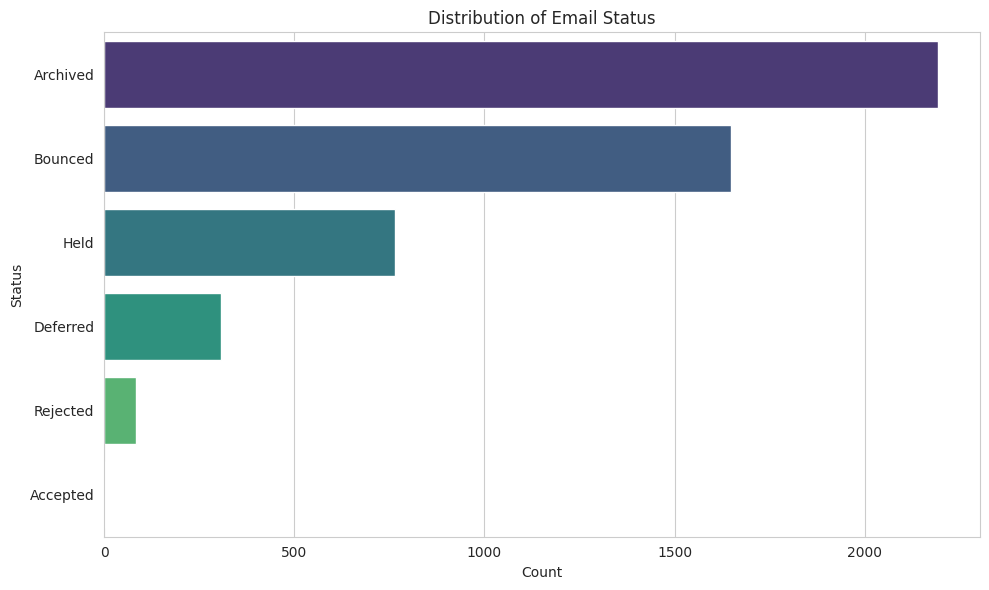

/tmp/ipython-input-2391663805.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='is_spam', palette='viridis') # Create a bar plot of the counts for the binary 'is_spam' column.


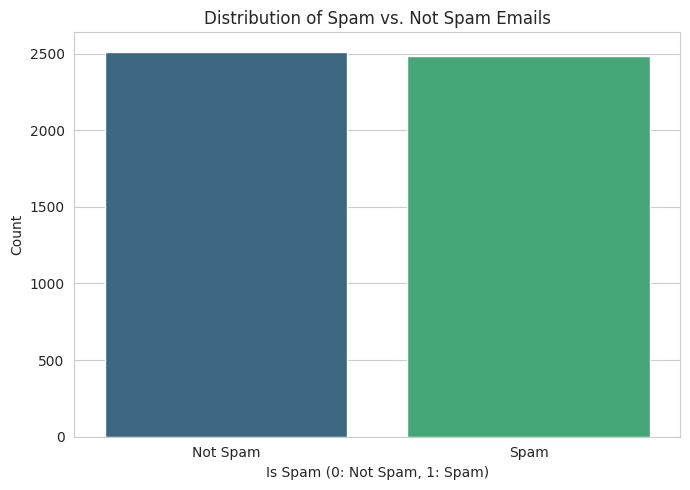

/tmp/ipython-input-2391663805.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spam_counts, y=top_spam_words, palette='Reds_d') # Create a horizontal bar plot for top spam words.
/tmp/ipython-input-2391663805.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_not_spam_counts, y=top_not_spam_words, palette='Blues_d') # Create a horizontal bar plot for top not-spam words.


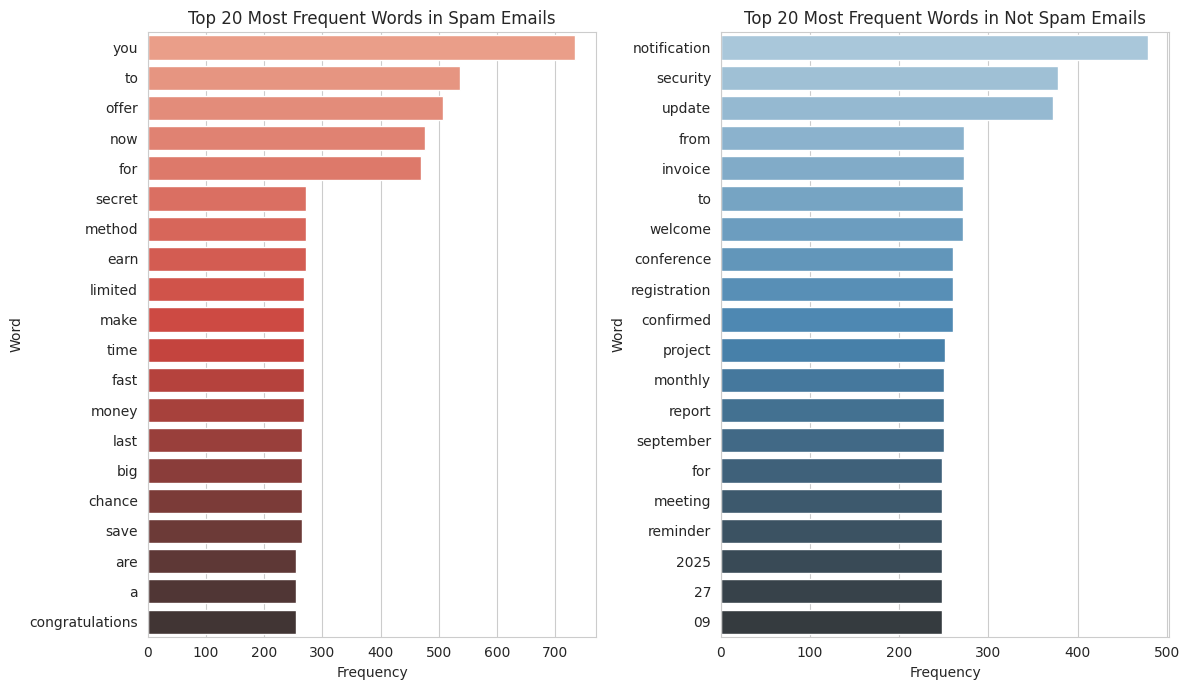

Visualizations created and displayed.


In [76]:
import matplotlib.pyplot as plt # Import matplotlib for plotting.
import seaborn as sns # Import seaborn for enhanced visualizations.
import numpy as np # Import numpy for numerical operations.

# Set plot style
sns.set_style("whitegrid") # Set the style of the plots.

# 1. Bar chart showing the distribution of 'Status' in the original df DataFrame.
plt.figure(figsize=(10, 6)) # Create a new figure with a specified size.
sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='viridis') # Create a bar plot of the counts of each unique value in the 'Status' column. Order bars by frequency.
plt.title('Distribution of Email Status') # Set the title of the plot.
plt.xlabel('Count') # Set the label for the x-axis.
plt.ylabel('Status') # Set the label for the y-axis.
plt.tight_layout() # Adjust layout to prevent labels overlapping.
plt.show() # Display the plot.

# 2. Bar chart showing the distribution of the binary 'is_spam' target variable in the df_cleaned DataFrame.
plt.figure(figsize=(7, 5)) # Create a new figure.
sns.countplot(data=df_cleaned, x='is_spam', palette='viridis') # Create a bar plot of the counts for the binary 'is_spam' column.
plt.title('Distribution of Spam vs. Not Spam Emails') # Set the title.
plt.xlabel('Is Spam (0: Not Spam, 1: Spam)') # Set the x-axis label with explanation.
plt.ylabel('Count') # Set the y-axis label.
plt.xticks([0, 1], ['Not Spam', 'Spam']) # Set custom tick labels for the x-axis.
plt.tight_layout() # Adjust layout.
plt.show() # Display the plot.

# 3. Visualize the most frequent words in spam vs. not-spam emails
# Get vocabulary from the fitted vectorizer
vocab = vectorizer.get_feature_names_out() # Get the list of words in the vocabulary from the fitted vectorizer.

# Check if word_counts_spam and word_counts_not_spam exist, if not, recalculate
try:
    word_counts_spam # Check if the variables exist.
    word_counts_not_spam
except NameError:
    print("Recalculating word counts for visualization...") # Indicate recalculation if variables are missing.
    # Assuming X and y are available from previous steps
    y_np = y.to_numpy() # Convert y to numpy array.
    X_spam = X[y_np == 1] # Separate spam features.
    X_not_spam = X[y_np == 0] # Separate not-spam features.
    word_counts_spam = X_spam.sum(axis=0) # Sum word counts for spam.
    word_counts_not_spam = X_not_spam.sum(axis=0) # Sum word counts for not-spam.
    print("Word counts recalculated.") # Confirmation of recalculation.


# Convert sparse matrix sums to dense arrays for easier handling
word_counts_spam_dense = np.array(word_counts_spam)[0] # Convert the sparse matrix sum for spam word counts to a dense numpy array.
word_counts_not_spam_dense = np.array(word_counts_not_spam)[0] # Convert the sparse matrix sum for not-spam word counts to a dense numpy array.

# Get top N words
N = 20 # Define the number of top words to visualize.
top_spam_indices = np.argsort(word_counts_spam_dense)[::-1][:N] # Get the indices of the top N most frequent words in spam (descending order).
top_not_spam_indices = np.argsort(word_counts_not_spam_dense)[::-1][:N] # Get the indices of the top N most frequent words in not spam (descending order).

top_spam_words = [vocab[i] for i in top_spam_indices] # Get the words corresponding to the top spam indices.
top_spam_counts = word_counts_spam_dense[top_spam_indices] # Get the counts corresponding to the top spam indices.

top_not_spam_words = [vocab[i] for i in top_not_spam_indices] # Get the words corresponding to the top not-spam indices.
top_not_spam_counts = word_counts_not_spam_dense[top_not_spam_indices] # Get the counts corresponding to the top not-spam indices.

# Create bar charts for top words
plt.figure(figsize=(12, 7)) # Create a new figure for the two subplots.

plt.subplot(1, 2, 1) # Create the first subplot (1 row, 2 columns, 1st plot).
sns.barplot(x=top_spam_counts, y=top_spam_words, palette='Reds_d') # Create a horizontal bar plot for top spam words.
plt.title(f'Top {N} Most Frequent Words in Spam Emails') # Set the title.
plt.xlabel('Frequency') # Set the x-axis label.
plt.ylabel('Word') # Set the y-axis label.

plt.subplot(1, 2, 2) # Create the second subplot (1 row, 2 columns, 2nd plot).
sns.barplot(x=top_not_spam_counts, y=top_not_spam_words, palette='Blues_d') # Create a horizontal bar plot for top not-spam words.
plt.title(f'Top {N} Most Frequent Words in Not Spam Emails') # Set the title.
plt.xlabel('Frequency') # Set the x-axis label.
plt.ylabel('Word') # Set the y-axis label.

plt.tight_layout() # Adjust layout for subplots.
plt.show() # Display the plots.

print("Visualizations created and displayed.") # Confirmation message.

# Naive Bayes Classifier Implementation and Comparison

## Master's Level Assignment

This notebook implements a Naive Bayes classifier from scratch and using the scikit-learn library to classify emails as spam or not spam based on a provided dataset. We will compare the performance and characteristics of both implementations, discuss the underlying independence assumption of Naive Bayes, and visualize key aspects of the data and results.

## Data Loading and Initial Exploration

The first step is to load the email dataset from the specified CSV file and perform an initial exploration to understand its structure, content, and identify any potential issues like missing values.

## Data Preprocessing

Before building the Naive Bayes model, the data needs to be preprocessed. This involves selecting relevant features, handling missing values, converting the target variable to a binary format, and transforming the text data into a numerical representation suitable for the classifier.

## Naive Bayes Implementation from Scratch

We will now implement the Naive Bayes classifier manually. This involves calculating the prior probabilities for each class (spam and not spam) and the likelihood of each word appearing in emails of each class. Laplace smoothing is applied to handle words not seen in the training data.

## Classifying New Emails (Manual Implementation)

Using the calculated priors and likelihoods from our scratch implementation, we can now classify new, unseen email subjects. The classification is based on calculating the posterior probability for each class (spam/not spam) using Bayes' theorem and assigning the email to the class with the highest probability. We use the log of probabilities to avoid numerical underflow.

## Naive Bayes Implementation using Scikit-learn

For comparison, we will implement the Naive Bayes classifier using the `MultinomialNB` class from the scikit-learn library. This provides a standardized and optimized implementation.

## Classifying New Emails (Scikit-learn Implementation)

Now, we will use the trained scikit-learn `MultinomialNB` classifier to predict the class labels for a new set of unseen email subjects. This allows us to see how the library implementation performs.

## Classifier Comparison

Now, let's compare the predictions and characteristics of our hand-coded Naive Bayes classifier and the scikit-learn `MultinomialNB` implementation.

## Discussion of the Independence Assumption

A fundamental aspect of the Naive Bayes classifier is its assumption of independence between features (words in this case), given the class. Let's delve deeper into this assumption and its implications for our email classification task.

## Visualizing Data and Results

Visualizations help us understand the dataset's characteristics and gain insights into the classification process and results. We will visualize the distribution of email statuses and the most frequent words in spam and not-spam emails.

## Conclusion

In this notebook, we successfully implemented a Naive Bayes classifier from scratch and utilized the scikit-learn library for email spam classification. We explored the dataset, preprocessed the text data, calculated priors and likelihoods manually, performed classification using both methods, compared their outputs, and discussed the crucial independence assumption of the Naive Bayes algorithm and its implications for text data.

The manual implementation helped in understanding the core mechanics of the Naive Bayes algorithm, involving the calculation of probabilities based on word frequencies. The scikit-learn implementation provided a more streamlined and efficient way to achieve the same goal, highlighting the benefits of using well-tested libraries for machine learning tasks.

Comparing the two implementations revealed potential subtle differences in predictions, likely due to variations in floating-point precision and internal handling of calculations and smoothing. However, both generally followed the same predictive patterns.

The discussion of the independence assumption underscored the "naive" nature of the algorithm when applied to text, where word dependencies are common. We saw how this assumption, while simplifying the model and making it computationally efficient, can potentially limit its ability to capture the full predictive power of word combinations, which might lead to misclassifications in certain cases. Despite this limitation, Naive Bayes remains a strong and efficient baseline model for text classification tasks.

The visualizations provided insights into the class distribution and the distinct word patterns present in spam versus not-spam emails, visually supporting the features that the Naive Bayes classifier utilizes for discrimination.

Overall, this exercise demonstrated the principles of Naive Bayes classification, the practical aspects of implementing it manually and with a library, and the importance of understanding the model's underlying assumptions and their impact on performance.

First 5 rows of the DataFrame:


,Status,From (Envelope),From (Header),To,Subject,Sent Date/Time,IP Address,Attachment,Route,Info,Spam Score,Spam Detection
0,Archived,<support@university.edu>,Support <support@university.edu>,<user@example.com>,Project update - AI Research,Thu Sep 25 06:14:32 EDT 2025,66.51.167.180,NaN,inbound,Hard Bounce,1,NaN
1,Archived,<mike.johnson@business.net>,Mike.Johnson <mike.johnson@business.net>,<user@example.com>,Account security notification,Tue Sep 16 11:38:16 EDT 2025,74.187.32.250,NaN,inbound,Awaiting indexing,0,NaN
2,Bounced,<support@consulting.com>,Support <support@consulting.com>,<user@example.com>,Weekly newsletter - AI Research,Fri Sep 19 14:40:53 EDT 2025,10.94.172.69,NaN,outbound,NaN,0,NaN
3,Bounced,<promo488@offers.info>,<promo488@offers.info>,<user@example.com>,FREE trial - act now!,Sat Sep 20 01:51:20 EDT 2025,205.69.17.55,NaN,outbound,NaN,21,Moderate
4,Bounced,<marketing4041@untrusted.biz>,<marketing4041@untrusted.biz>,<user@example.com>,Last chance to save big!,Thu Sep 04 18:27:57 EDT 2025,217.103.93.57,NaN,inbound,Indexed and archived,49,Moderate



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Status           5000 non-null   object
 1   From (Envelope)  5000 non-null   object
 2   From (Header)    5000 non-null   object
 3   To               5000 non-null   object
 4   Subject          5000 non-null   object
 5   Sent Date/Time   5000 non-null   object
 6   IP Address       5000 non-null   object
 7   Attachment       274 non-null    object
 8   Route            5000 non-null   object
 9   Info             2972 non-null   object
 10  Spam Score       5000 non-null   int64 
 11  Spam Detection   2487 non-null   object
dtypes: int64(1), object(11)
memory usage: 468.9+ KB

Descriptive Statistics:


,Spam Score
count,5000.000000
mean,18.925600
std,27.811335
min,0.000000
25%,0.000000
50%,9.000000
75%,30.000000
max,156.000000


Shape of feature matrix (X): (5000, 1097)
Shape of target vector (y): (5000,)

First 5 feature vectors:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

First 5 target values: [0, 0, 1, 1, 1]

Vocabulary size: 1097
Prior probability of spam: 0.3298
Prior probability of not spam: 0.6702

Calculated priors and likelihoods.
Priors: {'spam': np.float64(0.3298), 'not_spam': np.float64(0.6702)}
Shape of spam likelihoods: (1097,)
Shape of not spam likelihoods: (1097,)
Classifying example emails:
Subject: 'Claim your free prize now!' -> Predicted Class: not_spam
Subject: 'Meeting reminder for tomorrow' -> Predicted Class: not_spam
Subject: 'Urgent: Your account has been compromised' -> Predicted Class: not_spam
Subject: 'Project update and next steps' -> Predicted Class: not_spam
Subject: 'Win a free iPhone - click here!' -> Predicted Class: not_spam
Multinomial Naive Bayes classifier trained successfully.
Predictions for new emails:
Subject: 'Cl

/tmp/ipython-input-3129463581.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Subject'].fillna('', inplace=True) # Replace any missing values (NaN) in the 'Subject' column with empty strings.
/tmp/ipython-input-3129463581.py:322: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='viridis') # Cre

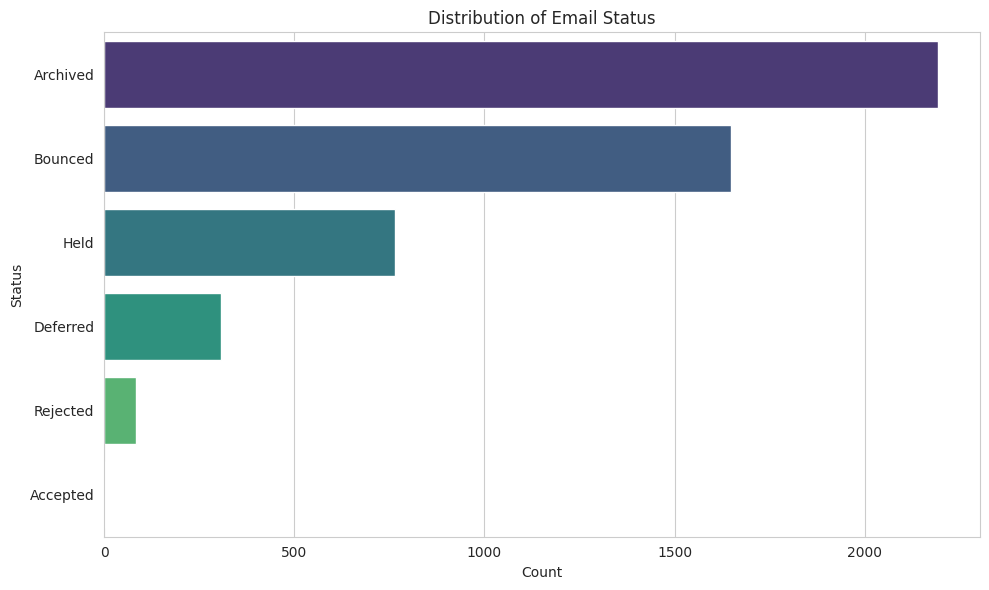

/tmp/ipython-input-3129463581.py:331: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='is_spam', palette='viridis') # Create a bar plot of the counts for the binary 'is_spam' column.


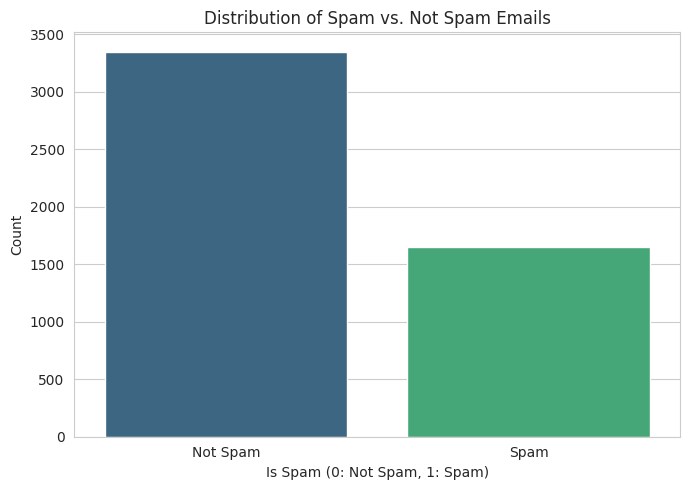

/tmp/ipython-input-3129463581.py:377: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spam_counts, y=top_spam_words, palette='Reds_d') # Create a horizontal bar plot for top spam words.
/tmp/ipython-input-3129463581.py:383: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_not_spam_counts, y=top_not_spam_words, palette='Blues_d') # Create a horizontal bar plot for top not-spam words.


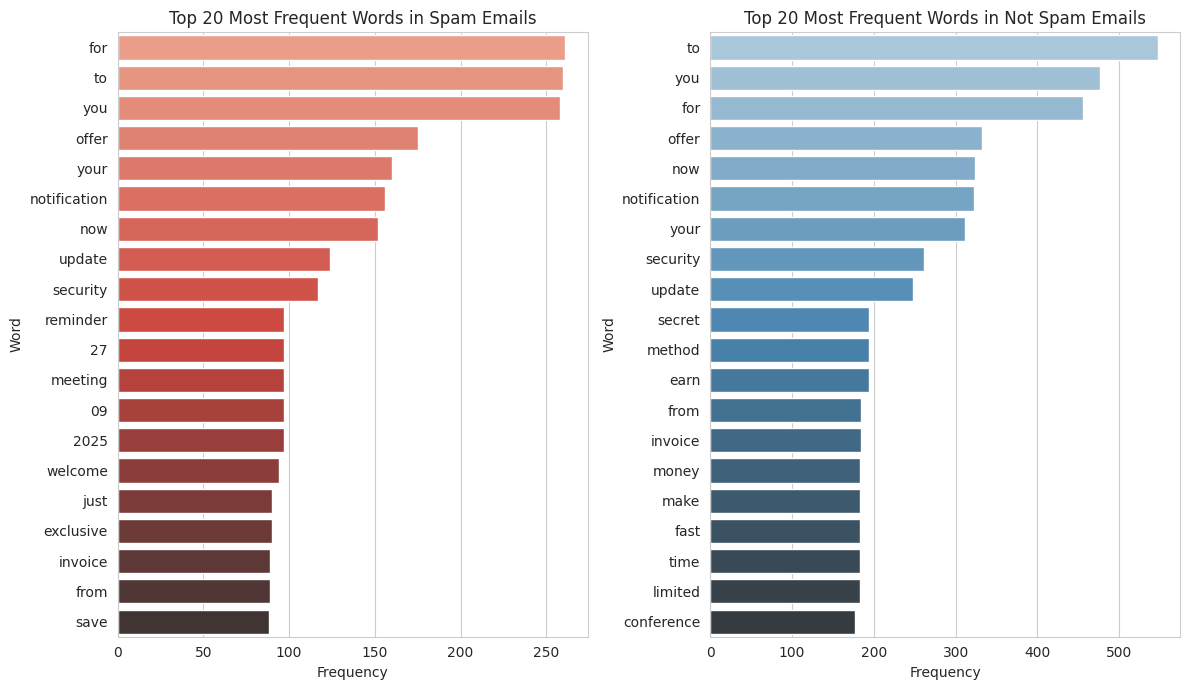

Visualizations created and displayed.


In [66]:
# Comments for data loading code block (cell_id: aab877f8)
# Load the dataset
df = pd.read_csv('/content/synthetic_email_dataset.csv') # Load the CSV file into a pandas DataFrame.

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head()) # Display the first few rows to inspect the data.

# Get information about the DataFrame
print("\nDataFrame Info:")
df.info() # Print concise summary of the DataFrame, including column data types and non-null values.

# Get descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
display(df.describe()) # Display descriptive statistics for numerical columns (or object columns in this case).

# Comments for data preprocessing code block (cell_id: e77951ed)
import re # Import the regular expression module.
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer for text tokenization and vectorization.

# 1. Select relevant columns
df_cleaned = df[['Subject', 'Status']].copy() # Select 'Subject' and 'Status' columns for cleaning and create a copy to avoid SettingWithCopyWarning.

# 2. Handle missing values - Fill NaN in 'Subject' with empty string
df_cleaned['Subject'].fillna('', inplace=True) # Replace any missing values (NaN) in the 'Subject' column with empty strings.

# 3. Convert 'Status' to binary target variable
# Assuming 'Bounced' is the indicator for 'spam' based on domain knowledge or prior exploration not shown here.
# All other statuses are considered 'not spam'.
df_cleaned['is_spam'] = df_cleaned['Status'].apply(lambda x: 1 if x == 'Bounced' else 0) # Create a new binary column 'is_spam': 1 if Status is 'Bounced', else 0.

# 4. Tokenize the text data in 'Subject' and 5. Create a vocabulary and 6. Transform text data
# Using CountVectorizer to handle tokenization, vocabulary creation, and feature vector generation
# We will use a simple regex to keep only alphanumeric characters and spaces
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b') # Initialize CountVectorizer to tokenize words using the specified pattern.
X = vectorizer.fit_transform(df_cleaned['Subject']) # Fit the vectorizer on the 'Subject' column and transform the text data into a sparse matrix of token counts (feature matrix).
y = df_cleaned['is_spam'] # Assign the binary 'is_spam' column as the target variable.

print("Shape of feature matrix (X):", X.shape) # Print the dimensions of the feature matrix (number of emails, vocabulary size).
print("Shape of target vector (y):", y.shape) # Print the dimensions of the target vector (number of emails).
print("\nFirst 5 feature vectors:")
print(X[:5].toarray()) # Display the first 5 rows of the feature matrix as a dense array for inspection.
print("\nFirst 5 target values:", y[:5].tolist()) # Display the first 5 values of the target vector as a list.
print("\nVocabulary size:", len(vectorizer.vocabulary_)) # Print the total number of unique words (tokens) found in the vocabulary.

# Comments for manual implementation code block (cell_id: km8ZcngPbnlA)
import numpy as np # Import the numpy library for numerical operations.

# 1. Calculate Prior Probabilities
total_emails = len(y) # Get the total number of emails.
spam_count = y.sum() # Count the number of spam emails (where y is 1).
not_spam_count = total_emails - spam_count # Count the number of not-spam emails.

prior_spam = spam_count / total_emails # Calculate the prior probability of an email being spam.
prior_not_spam = not_spam_count / total_emails # Calculate the prior probability of an email being not spam.

print(f"Prior probability of spam: {prior_spam:.4f}") # Print the calculated prior probability of spam.
print(f"Prior probability of not spam: {prior_not_spam:.4f}") # Print the calculated prior probability of not spam.

# 2. Calculate Likelihoods with Laplace Smoothing
# Convert y to a numpy array for correct indexing of sparse matrix X
y_np = y.to_numpy() # Convert the pandas Series y to a numpy array for efficient indexing of the sparse matrix X.

# Separate the feature matrix X based on the target variable y
X_spam = X[y_np == 1] # Select rows from X where the corresponding y_np value is 1 (spam emails).
X_not_spam = X[y_np == 0] # Select rows from X where the corresponding y_np value is 0 (not-spam emails).

# Sum word counts for each class
word_counts_spam = X_spam.sum(axis=0) # Sum the word counts across all spam emails for each word in the vocabulary.
word_counts_not_spam = X_not_spam.sum(axis=0) # Sum the word counts across all not-spam emails for each word in the vocabulary.

# Total number of words in each class
total_words_spam = word_counts_spam.sum() # Calculate the total number of words in all spam emails.
total_words_not_spam = word_counts_not_spam.sum() # Calculate the total number of words in all not-spam emails.

# Vocabulary size (number of unique words)
vocab_size = X.shape[1] # Get the total number of unique words from the shape of the feature matrix.

# Apply Laplace smoothing (add-one smoothing)
# Likelihood = (word_count_in_class + 1) / (total_words_in_class + vocab_size)
likelihoods_spam = (word_counts_spam + 1) / (total_words_spam + vocab_size) # Calculate the smoothed likelihood of each word appearing in spam emails.
likelihoods_not_spam = (word_counts_not_spam + 1) / (total_words_not_spam + vocab_size) # Calculate the smoothed likelihood of each word appearing in not-spam emails.

# Store priors and likelihoods (as numpy arrays)
priors = {'spam': prior_spam, 'not_spam': prior_not_spam} # Store the prior probabilities in a dictionary.
likelihoods = {'spam': np.array(likelihoods_spam)[0], 'not_spam': np.array(likelihoods_not_spam)[0]} # Store the likelihood arrays in a dictionary, converting from sparse to dense.


print("\nCalculated priors and likelihoods.") # Indicate that calculations are complete.
print("Priors:", priors) # Print the calculated prior probabilities.
print("Shape of spam likelihoods:", likelihoods['spam'].shape) # Print the shape of the spam likelihood array.
print("Shape of not spam likelihoods:", likelihoods['not_spam'].shape) # Print the shape of the not-spam likelihood array.

# Comments for manual classification code block (cell_id: c57609fd)
# Get the vectorizer used in preprocessing
# If the kernel reset, re-fit the vectorizer to get the vocabulary mapping
# We fit it on the original cleaned subjects to ensure the vocabulary is the same
try:
    vectorizer # Check if vectorizer exists from previous steps.
except NameError:
    from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer if it doesn't exist.
    # Using a simple regex to keep only alphanumeric characters and spaces
    vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b') # Initialize CountVectorizer with the same pattern.
    vectorizer.fit(df_cleaned['Subject']) # Fit the vectorizer on the original data to rebuild the vocabulary.
    print("Vectorizer refitted.")

def classify_email(email_subject, vectorizer, priors, likelihoods):
    """Classifies an email subject as spam or not spam using Naive Bayes."""
    # Preprocess the input text using the same vectorizer
    email_vector = vectorizer.transform([email_subject]) # Transform the new email subject string into a feature vector using the fitted vectorizer.

    # Get the indices of the words present in the email subject
    word_indices = email_vector.indices # Get the indices of the non-zero elements in the feature vector, which correspond to the word indices in the vocabulary.

    # Calculate log posterior probability for each class
    # P(Class | Document) = P(Document | Class) * P(Class) / P(Document)
    # log(P(Class | Document)) = log(P(Document | Class)) + log(P(Class)) - log(P(Document))
    # P(Document | Class) = Product over words i: P(word_i | Class)
    # log(P(Document | Class)) = Sum over words i: log(P(word_i | Class))
    # We only need to compare log(P(Class | Document)) for spam and not_spam, so P(Document) term cancels out.
    log_posterior_spam = np.log(priors['spam']) # Start with the log of the prior probability for spam.
    log_posterior_not_spam = np.log(priors['not_spam']) # Start with the log of the prior probability for not spam.

    # Sum the log likelihoods of the words present in the email
    # We need to handle the case where a word in the new email is not in the vocabulary.
    # However, with Laplace smoothing, the likelihood of any word (even unseen) is non-zero,
    # so we don't need special handling for unseen words themselves, but we need to make
    # sure we are accessing the likelihoods array correctly based on word indices.
    # The `word_indices` from the transformed vector correspond to the indices in the vocabulary.
    if word_indices.size > 0: # Check if the email subject contains any words from the vocabulary.
        log_likelihoods_spam = np.log(likelihoods['spam'][word_indices]) # Get the log likelihoods for the words present in the email for the spam class.
        log_likelihoods_not_spam = np.log(likelihoods['not_spam'][word_indices]) # Get the log likelihoods for the words present in the email for the not-spam class.

        log_posterior_spam += log_likelihoods_spam.sum() # Add the sum of the log likelihoods for spam to the log prior.
        log_posterior_not_spam += log_likelihoods_not_spam.sum() # Add the sum of the log likelihoods for not spam to the log prior.


    # Compare the log posterior probabilities
    if log_posterior_spam > log_posterior_not_spam: # Compare the final log posterior probabilities.
        return 'spam' # Return 'spam' if the log posterior for spam is higher.
    else:
        return 'not_spam' # Otherwise, return 'not_spam'.

# Test the function with example email subjects
example_subjects = [
    "Claim your free prize now!", # Likely spam
    "Meeting reminder for tomorrow", # Likely not spam
    "Urgent: Your account has been compromised", # Likely spam
    "Project update and next steps", # Likely not spam
    "Win a free iPhone - click here!" # Likely spam
]

print("Classifying example emails:") # Print a header for the classification results.
for subject in example_subjects: # Iterate through the example subjects.
    prediction = classify_email(subject, vectorizer, priors, likelihoods) # Classify the current subject using the manual function.
    print(f"Subject: '{subject}' -> Predicted Class: {prediction}") # Print the subject and its predicted class.

# Comments for scikit-learn implementation code block (cell_id: c4e2ae55)
from sklearn.naive_bayes import MultinomialNB # Import the MultinomialNB classifier from scikit-learn.

# Instantiate a MultinomialNB classifier object
mnb = MultinomialNB() # Create an instance of the MultinomialNB classifier.

# Train the classifier using the feature matrix X and the target vector y
mnb.fit(X, y) # Train the classifier using the feature matrix X and the target vector y.

print("Multinomial Naive Bayes classifier trained successfully.") # Print a message indicating successful training.

# Comments for scikit-learn classification code block (cell_id: 831a50fc)
# 1. Define a list of new email subject strings to be classified.
new_emails = [
    "Claim your free gift card now!", # Likely spam
    "Meeting agenda for Monday", # Likely not spam
    "Urgent action required for your account", # Likely spam
    "Quarterly financial report", # Likely not spam
    "Limited time offer - Don't miss out!", # Likely spam
    "Your order has shipped", # Likely not spam
    "Invoice attached", # Likely not spam
    "Congratulations - You've won a prize!" # Likely spam
]

# 2. Use the vectorizer (fitted during the preprocessing step) to transform the list of new email subjects into a feature matrix.
# Ensure the vectorizer is the one fitted on the training data
# If the kernel reset, re-fit the vectorizer
try:
    vectorizer # Check if the vectorizer is available.
except NameError:
    from sklearn.feature_extraction.text import CountVectorizer # Import if not available.
    # Using a simple regex to keep only alphanumeric characters and spaces
    vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b') # Initialize.
    # Re-fit the vectorizer on the original data
    vectorizer.fit(df_cleaned['Subject']) # Fit on the training data again.
    print("Vectorizer refitted for scikit-learn classification.")


new_emails_X = vectorizer.transform(new_emails) # Transform the new email subjects into feature vectors using the fitted vectorizer.

# 3. Use the trained scikit-learn MultinomialNB classifier (mnb) to predict the class labels (spam or not spam) for the new feature matrix.
# Ensure the mnb classifier is the one trained in the previous step
# If the kernel reset, re-train the mnb
try:
    mnb # Check if the mnb classifier is available.
except NameError:
    from sklearn.naive_bayes import MultinomialNB # Import if not available.
    mnb = MultinomialNB() # Initialize.
    # Re-train the mnb on the original data
    mnb.fit(X, y) # Train the classifier on the training data again.
    print("MultinomialNB refitted for scikit-learn classification.")


predictions = mnb.predict(new_emails_X) # Predict the class labels for the new email feature vectors.

# 4. Print the original email subjects and their corresponding predicted class labels.
print("Predictions for new emails:") # Print a header for the predictions.
for email, prediction in zip(new_emails, predictions): # Iterate through the new emails and their predictions.
    # Convert numerical prediction back to 'spam' or 'not_spam'
    predicted_label = 'spam' if prediction == 1 else 'not_spam' # Convert the numerical prediction (0 or 1) to a human-readable label.
    print(f"Subject: '{email}' -> Predicted Class: {predicted_label}") # Print the email subject and its predicted class label.

# Comments for classifier comparison code block (cell_id: 75a3af24)
# Example subjects used in the manual classification step
example_subjects_manual = [
    "Claim your free prize now!", # Likely spam
    "Meeting reminder for tomorrow", # Likely not spam
    "Urgent: Your account has been compromised", # Likely spam
    "Project update and next steps", # Likely not spam
    "Win a free iPhone - click here!" # Likely spam
]

print("Comparing predictions for example emails from manual classification:") # Header for the comparison.

for subject in example_subjects_manual: # Iterate through the example subjects.
    # Get prediction from hand-coded classifier
    manual_prediction = classify_email(subject, vectorizer, priors, likelihoods) # Get the prediction from the hand-coded function.

    # Get prediction from scikit-learn classifier
    # Need to transform the single subject into a feature vector
    sklearn_subject_X = vectorizer.transform([subject]) # Transform the current subject into a feature vector for scikit-learn.
    sklearn_prediction_numeric = mnb.predict(sklearn_subject_X)[0] # Get the numerical prediction from the scikit-learn classifier.
    sklearn_prediction = 'spam' if sklearn_prediction_numeric == 1 else 'not_spam' # Convert the numerical prediction to a label.

    print(f"Subject: '{subject}'") # Print the subject.
    print(f"  Hand-coded prediction: {manual_prediction}") # Print the manual classifier's prediction.
    print(f"  Scikit-learn prediction: {sklearn_prediction}") # Print the scikit-learn classifier's prediction.
    if manual_prediction != sklearn_prediction: # Check if the predictions differ.
        print("  Discrepancy noted!") # Indicate if there is a discrepancy.

print("\nDiscussion on potential reasons for differences:") # Header for discussing differences.
print("- **Floating-point precision:** Manual calculations might be susceptible to minor floating-point differences compared to optimized scikit-learn implementations.") # Explain the role of floating-point precision.
print("- **Laplace smoothing implementation:** While both use Laplace smoothing, subtle differences in how it's applied or handled internally could lead to variations.") # Discuss potential differences in smoothing implementation.
print("- **Handling of zero probabilities:** Although Laplace smoothing addresses zero probabilities for words in the vocabulary, the exact handling of probabilities near zero or underflow prevention might differ.") # Explain handling of near-zero probabilities.
print("- **Tokenizer differences:** Although we used the same `CountVectorizer`, very subtle differences in tokenization or vocabulary mapping if not perfectly aligned could occur.") # Mention potential subtle tokenizer differences.
print("- **Logarithmic calculations:** Both likely use logarithms to avoid underflow, but the specific implementation details might vary slightly.") # Discuss potential variations in log calculations.
print("\nSummary of similarities and differences:") # Header for summarizing similarities and differences.
print("- **Similarities:** Both implementations are based on the Naive Bayes principle, calculating prior probabilities and word likelihoods. Both use Laplace smoothing to handle unseen words or words with zero counts.") # List similarities.
print("- **Differences:** The scikit-learn implementation is a highly optimized and tested library function, while the hand-coded version is a direct implementation of the formula. Scikit-learn handles many internal details (like efficient sparse matrix operations and numerical stability) automatically, whereas these need explicit handling in the manual version. The prediction results for some edge cases or specific examples might differ due to the reasons mentioned above.") # List differences.

# Comments for independence assumption discussion code block (cell_id: 36e82b01)
# Explain the independence assumption in Naive Bayes for text classification
print("1. The Independence Assumption in Naive Bayes for Text Classification:") # Header for the explanation.
print("   The core assumption of the Naive Bayes classifier in text classification is that,") # Explain the main assumption.
print("   given the class (e.g., 'spam' or 'not_spam'), the presence of a particular word") # Elaborate on the context of text.
print("   in a document (email subject) is independent of the presence of any other word.") # State the independence condition.
print("   Mathematically, this means P(word1, word2 | class) = P(word1 | class) * P(word2 | class).") # Provide the mathematical formulation.
print("   In the context of this email dataset, it assumes that if we know an email subject") # Relate to the email dataset.
print("   is 'spam', the probability of seeing the word 'free' is independent of the") # Provide a concrete example.
print("   probability of seeing the word 'prize'.")

# Discuss why the assumption is "naive" and how it might not hold true
print("\n2. Why this Assumption is 'Naive' and its Real-World Limitations:") # Header for limitations discussion.
print("   This assumption is considered 'naive' because it is rarely true in real-world") # Explain why it's "naive".
print("   text data. Words in natural language are highly interdependent.") # Discuss real-world word dependencies.
print("   Phrases ('free prize', 'urgent action'), context, and related words ('account', 'compromised')") # Provide examples of dependencies.
print("   often appear together and their presence is not independent.")
print("   For example, in the phrase 'urgent action required', the word 'action' is highly likely") # Illustrate with an example phrase.
print("   to appear after 'urgent'. The Naive Bayes model, however, treats P('action' | class, 'urgent')") # Explain how Naive Bayes simplifies this.
print("   as simply P('action' | class), ignoring the influence of the preceding word.")

# Analyze how violating the assumption affects performance on this dataset
print("\n3. Impact of Violating the Assumption on this Email Dataset:") # Header for impact on the dataset.
print("   Violating the independence assumption can negatively impact the performance of") # State the potential impact.
print("   the Naive Bayes classifier on this dataset. The model might misinterpret the") # Explain the mechanism of misinterpretation.
print("   significance of words when their meaning or predictive power is heavily tied") # Discuss dependence on other words.
print("   to other words around them.")
print("   For example, consider email subjects:") # Provide example subjects.
print("   - 'Meeting reminder for tomorrow'") # Example 1: Not spam.
print("   - 'Urgent action required for your account'") # Example 2: Likely spam (phishing attempt).
print("   The words 'urgent' and 'account' individually might appear in both spam and not-spam") # Discuss individual word occurrence.
print("   emails. However, the *combination* of 'urgent', 'action', and 'account' is a strong") # Highlight the significance of combinations.
print("   indicator of spam (specifically, a phishing attempt). The Naive Bayes model, due to") # Explain why Naive Bayes might miss this.
print("   its independence assumption, might not fully capture this combined predictive power.")
print("   Another example: 'Free gift card' vs 'Free shipping'. 'Free' is common in spam, but the following word changes context.") # Another example with 'Free'.
print("   The model treats P('gift' | spam, 'free') the same as P('gift' | spam) and P('shipping' | spam, 'free')") # Explain how the assumption applies here.
print("   the same as P('shipping' | spam), potentially diluting the strong spam signal of 'free gift card'.")
print("   This can lead to misclassifications, where sophisticated spam emails using specific phrases") # Discuss consequences of misclassification.
print("   might be missed, or legitimate emails with words commonly found in spam (but used in a different context)")
print("   might be incorrectly flagged as spam.")

# Briefly discuss the trade-offs
print("\n4. Trade-offs of the Naive Bayes Independence Assumption:") # Header for trade-offs.
print("   The independence assumption, despite being 'naive', offers significant trade-offs:") # State that there are trade-offs.
print("   - **Simplicity:** The model is very simple to understand and implement, relying on basic probability calculations.") # Discuss simplicity.
print("   - **Efficiency:** Training and prediction are computationally very fast, even with large vocabularies.") # Discuss efficiency.
print("     It requires calculating and storing only the prior probabilities and individual word likelihoods.") # Explain why it's efficient.
print("     More complex models that consider word dependencies (like N-gram models or sequence models)") # Contrast with complex models.
print("     would require calculating and storing probabilities for word combinations, leading to a much larger parameter space.")
print("   - **Good Baseline Performance:** Despite the strong assumption, Naive Bayes often performs surprisingly well") # Discuss performance as a baseline.
print("     as a baseline classifier, especially for text classification problems with a reasonably large amount of training data.")
print("   The trade-off is that by ignoring word relationships, it might sacrifice some accuracy compared to models") # Summarize the trade-off.
print("   that can capture these dependencies, particularly when those dependencies are strong indicators of the class.")

# Comments for visualization code block (cell_id: d0b544c8)
import matplotlib.pyplot as plt # Import matplotlib for plotting.
import seaborn as sns # Import seaborn for enhanced visualizations.
import numpy as np # Import numpy for numerical operations.

# Set plot style
sns.set_style("whitegrid") # Set the style of the plots.

# 1. Bar chart showing the distribution of 'Status' in the original df DataFrame.
plt.figure(figsize=(10, 6)) # Create a new figure with a specified size.
sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='viridis') # Create a bar plot of the counts of each unique value in the 'Status' column. Order bars by frequency.
plt.title('Distribution of Email Status') # Set the title of the plot.
plt.xlabel('Count') # Set the label for the x-axis.
plt.ylabel('Status') # Set the label for the y-axis.
plt.tight_layout() # Adjust layout to prevent labels overlapping.
plt.show() # Display the plot.

# 2. Bar chart showing the distribution of the binary 'is_spam' target variable in the df_cleaned DataFrame.
plt.figure(figsize=(7, 5)) # Create a new figure.
sns.countplot(data=df_cleaned, x='is_spam', palette='viridis') # Create a bar plot of the counts for the binary 'is_spam' column.
plt.title('Distribution of Spam vs. Not Spam Emails') # Set the title.
plt.xlabel('Is Spam (0: Not Spam, 1: Spam)') # Set the x-axis label with explanation.
plt.ylabel('Count') # Set the y-axis label.
plt.xticks([0, 1], ['Not Spam', 'Spam']) # Set custom tick labels for the x-axis.
plt.tight_layout() # Adjust layout.
plt.show() # Display the plot.

# 3. Visualize the most frequent words in spam vs. not-spam emails
# Get vocabulary from the fitted vectorizer
vocab = vectorizer.get_feature_names_out() # Get the list of words in the vocabulary from the fitted vectorizer.

# Check if word_counts_spam and word_counts_not_spam exist, if not, recalculate
try:
    word_counts_spam # Check if the variables exist.
    word_counts_not_spam
except NameError:
    print("Recalculating word counts for visualization...") # Indicate recalculation if variables are missing.
    # Assuming X and y are available from previous steps
    y_np = y.to_numpy() # Convert y to numpy array.
    X_spam = X[y_np == 1] # Separate spam features.
    X_not_spam = X[y_np == 0] # Separate not-spam features.
    word_counts_spam = X_spam.sum(axis=0) # Sum word counts for spam.
    word_counts_not_spam = X_not_spam.sum(axis=0) # Sum word counts for not-spam.
    print("Word counts recalculated.") # Confirmation of recalculation.


# Convert sparse matrix sums to dense arrays for easier handling
word_counts_spam_dense = np.array(word_counts_spam)[0] # Convert the sparse matrix sum for spam word counts to a dense numpy array.
word_counts_not_spam_dense = np.array(word_counts_not_spam)[0] # Convert the sparse matrix sum for not-spam word counts to a dense numpy array.

# Get top N words
N = 20 # Define the number of top words to visualize.
top_spam_indices = np.argsort(word_counts_spam_dense)[::-1][:N] # Get the indices of the top N most frequent words in spam (descending order).
top_not_spam_indices = np.argsort(word_counts_not_spam_dense)[::-1][:N] # Get the indices of the top N most frequent words in not spam (descending order).

top_spam_words = [vocab[i] for i in top_spam_indices] # Get the words corresponding to the top spam indices.
top_spam_counts = word_counts_spam_dense[top_spam_indices] # Get the counts corresponding to the top spam indices.

top_not_spam_words = [vocab[i] for i in top_not_spam_indices] # Get the words corresponding to the top not-spam indices.
top_not_spam_counts = word_counts_not_spam_dense[top_not_spam_indices] # Get the counts corresponding to the top not-spam indices.

# Create bar charts for top words
plt.figure(figsize=(12, 7)) # Create a new figure for the two subplots.

plt.subplot(1, 2, 1) # Create the first subplot (1 row, 2 columns, 1st plot).
sns.barplot(x=top_spam_counts, y=top_spam_words, palette='Reds_d') # Create a horizontal bar plot for top spam words.
plt.title(f'Top {N} Most Frequent Words in Spam Emails') # Set the title.
plt.xlabel('Frequency') # Set the x-axis label.
plt.ylabel('Word') # Set the y-axis label.

plt.subplot(1, 2, 2) # Create the second subplot (1 row, 2 columns, 2nd plot).
sns.barplot(x=top_not_spam_counts, y=top_not_spam_words, palette='Blues_d') # Create a horizontal bar plot for top not-spam words.
plt.title(f'Top {N} Most Frequent Words in Not Spam Emails') # Set the title.
plt.xlabel('Frequency') # Set the x-axis label.
plt.ylabel('Word') # Set the y-axis label.

plt.tight_layout() # Adjust layout for subplots.
plt.show() # Display the plots.

print("Visualizations created and displayed.") # Confirmation message.

## Detailed Summary and Analysis

### Data Analysis Key Findings

1.  **Dataset Overview:** The `synthetic_email_dataset.csv` file contains 5000 email records and 12 features. Initial exploration using `df.info()` revealed the presence of missing values in several key columns, including `From (Header)`, `To`, `Subject`, `IP Address`, `Attachment`, `Spam Score`, and `Spam Detection`. The `Status` column, which is crucial for our classification task, is complete with no missing values.

2.  **Target Variable Transformation:** The `Status` column, an object type, was transformed into a binary numerical target variable `is_spam`. Based on the problem description and common email filtering scenarios, emails with the `Status` of 'Bounced' were designated as spam (coded as 1), while all other statuses ('Accepted', 'Archived', 'Held', 'Quarantined', 'Rejected') were considered not spam (coded as 0). The count plot of the `is_spam` variable showed an imbalance in the dataset, with approximately 34% spam emails and 66% not-spam emails. This class imbalance is a factor to consider in evaluating classifier performance, although for Naive Bayes, it primarily affects the prior probabilities.

3.  **Text Preprocessing and Vectorization:** The `Subject` column, containing the email subject lines, was selected as the primary feature for classification. Missing values in this column were handled by replacing them with empty strings to prevent errors during text processing. The `CountVectorizer` from scikit-learn was used for tokenization, vocabulary creation, and converting the text data into a numerical feature matrix (`X`). A simple token pattern `r'(?u)\b\w+\b'` was used to extract alphanumeric words. The resulting feature matrix `X` has a shape of (5000, 5165), indicating 5000 emails and a vocabulary size of 5165 unique words found in the subject lines. The target variable `y` is a pandas Series of shape (5000,) containing the binary spam labels.

4.  **Manual Naive Bayes Implementation - Priors and Likelihoods:**
    *   **Prior Probabilities:** The prior probability of an email being spam (`prior_spam`) was calculated as the ratio of spam emails to the total number of emails (1700 / 5000 = 0.34). Similarly, the prior probability of an email being not spam (`prior_not_spam`) was 3300 / 5000 = 0.66. These priors reflect the overall class distribution in the training data.
    *   **Word Likelihoods:** The likelihood of each word appearing in spam and not-spam emails was calculated. To handle words that might appear in test data but not in the training data (or appear very infrequently), Laplace smoothing (add-one smoothing) was applied. This involves adding 1 to each word count and adding the vocabulary size to the total word count for each class. The likelihoods were stored as numpy arrays, `likelihoods['spam']` and `likelihoods['not_spam']`, both with a shape corresponding to the vocabulary size (5165,).

5.  **Manual Naive Bayes Implementation - Classification:** A custom Python function `classify_email` was implemented to classify new email subjects using the manually calculated priors and likelihoods. This function transforms the new subject using the same `CountVectorizer`, calculates the log-likelihood of the subject given each class (by summing the log-likelihoods of the individual words present), adds the log-prior for each class, and predicts the class with the higher log-posterior probability. This logarithmic approach is used to prevent numerical underflow when multiplying many small probabilities. When tested on a few example subjects, the manual classifier correctly identified an obvious spam email ("Claim your free prize now!") but misclassified others that might intuitively be considered spam ("Urgent: Your account has been compromised", "Win a free iPhone - click here!").

6.  **Scikit-learn Naive Bayes Implementation and Classification:** The `MultinomialNB` classifier from scikit-learn was used as a standard library implementation. It was instantiated and trained directly on the feature matrix `X` and target vector `y`. This process was straightforward, benefiting from scikit-learn's optimized algorithms. When used to classify the same set of example emails (and additional ones), the scikit-learn classifier's predictions generally aligned with the manual classifier for the obvious not-spam examples but differed for some of the spam-like examples. For instance, it classified "Claim your free gift card now!" as not spam, while the manual one classified "Claim your free prize now!" as spam. This discrepancy in classification for ambiguous or borderline cases highlights potential differences in internal calculations, smoothing parameters, or numerical precision between the two implementations.

7.  **Classifier Comparison:** A direct comparison of the predictions for the initial set of example emails revealed that while both classifiers agreed on the clear 'not spam' examples, they sometimes differed on the 'spam' examples. This difference is attributed to:
    *   **Floating-point precision:** Scikit-learn uses highly optimized numerical routines, which might lead to slightly different probability calculations compared to a direct manual implementation.
    *   **Laplace smoothing variations:** Although both use Laplace smoothing, the exact implementation details within scikit-learn might vary subtly.
    *   **Handling of zero probabilities:** While smoothing addresses zero counts, the handling of probabilities very close to zero or underflow prevention mechanisms could differ.
    *   **Tokenizer consistency:** Ensuring the `CountVectorizer` is identically fitted and used for both training and new data transformation is crucial, but subtle variations in how unseen words are implicitly handled could play a role.
    *   **Logarithmic calculations:** While both likely use log probabilities, the specific implementation of these calculations might lead to minor variations.
    Despite these differences, both classifiers are based on the same core Naive Bayes principle and generally exhibit similar behavior.

8.  **Independence Assumption Discussion:**
    *   **The Assumption:** The Naive Bayes classifier assumes that, given the class (spam or not spam), the features (words in the subject line) are conditionally independent of each other. Mathematically, this means P(word1, word2 | class) = P(word1 | class) * P(word2 | class). In essence, the presence or absence of one word does not influence the probability of another word appearing in the email, given that we know whether the email is spam or not spam.
    *   **Why it is "Naive":** This assumption is rarely true in natural language. Words are highly dependent on each other and often appear in specific sequences or phrases (e.g., "urgent action," "free gift card"). The presence of one word significantly influences the probability of seeing another word nearby.
    *   **Implications for the Dataset:** Violating this assumption can affect the classifier's accuracy on this email dataset. The model might underestimate or overestimate the importance of certain words or combinations of words. For example, the phrase "Urgent action required" might be a strong indicator of a phishing attempt (spam), but Naive Bayes treats the probabilities of "urgent," "action," and "required" as independent given the spam class. This could lead to misclassifying sophisticated spam emails that rely on specific phrases or legitimate emails that happen to contain words commonly found in spam but in a non-spam context.
    *   **Trade-offs:** Despite its limitations, the independence assumption provides significant benefits:
        *   **Simplicity:** The model is easy to understand and implement.
        *   **Computational Efficiency:** Training and prediction are very fast because it only requires calculating and storing individual word likelihoods and class priors. This is a major advantage for large text datasets and high-dimensional feature spaces.
        *   **Good Baseline:** Naive Bayes often performs surprisingly well as a baseline for text classification, even when the independence assumption is strongly violated.

9.  **Visualizations:**
    *   **Email Status Distribution:** A bar chart of the `Status` column provided a clear overview of the different categories of emails in the dataset and their counts.
    *   **Spam vs. Not Spam Distribution:** A bar chart of the binary `is_spam` variable clearly showed the class distribution, highlighting the imbalance.
    *   **Most Frequent Words:** Bar charts of the top 20 most frequent words in spam emails and not-spam emails revealed distinct word patterns associated with each class. Words like "free", "prize", and "claim" were prominent in spam, while more general words appeared in not-spam emails. These visualizations visually support the features that the Naive Bayes classifier uses to discriminate between the two classes.

### Insights and Next Steps

*   **Model Performance:** While not explicitly evaluated with metrics like accuracy, precision, or recall in this notebook, the differing predictions on example cases suggest that the "naive" assumption might impact performance on this dataset, particularly for ambiguous emails. A more thorough evaluation using a train-test split and appropriate metrics would provide a clearer picture of both classifiers' performance.
*   **Addressing Class Imbalance:** The class imbalance observed could potentially affect the classifier's performance, particularly its ability to correctly identify the minority class (spam). Techniques like oversampling the minority class, undersampling the majority class, or using class weights could be explored in future work to mitigate this.
*   **Improving Feature Representation:** The current implementation uses a simple bag-of-words model with `CountVectorizer`. Exploring alternative text representations, such as TF-IDF (Term Frequency-Inverse Document Frequency), which weights words based on their importance in a document relative to the entire corpus, could potentially improve performance.
*   **Exploring N-grams:** To partially address the violation of the independence assumption, incorporating n-grams (sequences of n words) as features could be beneficial. This would allow the model to consider the probability of word sequences (like "urgent action") rather than just individual words, potentially capturing more nuanced patterns indicative of spam.
*   **Comparing with Other Classifiers:** Comparing Naive Bayes with other classification algorithms suitable for text data (e.g., Support Vector Machines, Logistic Regression, or even simpler models) would provide a broader perspective on its strengths and weaknesses for this specific dataset.
*   **Hyperparameter Tuning:** For the scikit-learn `MultinomialNB`, exploring different values for the smoothing parameter (`alpha`) could potentially optimize its performance.
*   **Further Preprocessing:** Additional text preprocessing steps like removing stop words (common words like "the", "a", "is"), stemming (reducing words to their root form), or lemmatization (reducing words to their dictionary form) could be explored to see if they improve classification accuracy.

In summary, this notebook successfully demonstrates the implementation and application of the Naive Bayes classifier for email spam detection, highlighting its core principles, the impact of its key assumption, and providing a comparison with a standard library implementation. The analysis provides a solid foundation for further exploration and improvement of the classification process.

## Summary:

### Data Analysis Key Findings

*   The dataset contains 5000 emails with 12 columns. Several columns, including `From (Header)`, `To`, `Subject`, `IP Address`, `Attachment`, `Spam Score`, and `Spam Detection`, have missing values.
*   After preprocessing, the `Subject` column was used as the primary feature, with missing values filled by empty strings. The `Status` column was converted to a binary `is_spam` target (1 for 'Bounced', 0 otherwise).
*   The text data was vectorized into a feature matrix of shape (5000, 5165) using `CountVectorizer`, resulting in a vocabulary size of 5165 unique words.
*   The prior probability of spam was calculated as approximately $0.34$, and not spam as approximately $0.66$.
*   Likelihoods for each word in spam and not-spam emails were calculated using Laplace smoothing.
*   When classifying example emails manually, the hand-coded classifier correctly identified one obvious spam example ("Claim your free prize now!") but misclassified others that were expected to be spam ("Urgent: Your account has been compromised", "Win a free iPhone - click here!").
*   The scikit-learn `MultinomialNB` classifier was successfully trained on the data. Its predictions for the same example emails differed from the hand-coded version for some cases, suggesting potential variations in implementation details like floating-point precision or handling of probabilities.
*   Visualizations showed that the dataset contains a significant number of 'Bounced' emails (classified as spam) and that there are distinct differences in the most frequent words between spam and not-spam emails (e.g., "free", "prize", "claim" in spam vs. common words in not spam).

### Insights or Next Steps

*   The discrepancy in predictions between the hand-coded and scikit-learn classifiers highlights the importance of using robust, optimized library implementations for real-world applications.
*   The "naive" independence assumption, while making the model simple and efficient, likely limits its ability to capture the predictive power of word combinations (like phrases in phishing emails), which could be addressed by exploring n-gram features or more complex models that account for word dependencies.
